In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, timedelta

from matplotlib import pyplot
from scipy.stats import norm

In [2]:
#We will analyse VaR based on historical data of last two trading years (252*2 days)

start_date = (date.today()-timedelta(days=(252*2))).isoformat() 

#Two assets in portfolio, Microsft and Apple

yfinance_tickers = ['MSFT','AAPL']

#Weights of the two assets in portfolio are 60% and 40% (100% in total)

weights=np.array([0.6,0.4])

In [3]:
#Downloading via Yahoo python API

for ticker in yfinance_tickers:
    data=yf.download(yfinance_tickers, start=start_date)
    
    #I am going to use just the unadjusted closing price
    data=data['Close']   

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


In [4]:
#Lets do the dataframe for easier data manipulation

df = pd.DataFrame({
        'microsoft':data['MSFT'],
        'apple':data['AAPL']
        })

df = df.dropna(axis=0)

In [5]:
#Now lets get some important statistical properties

#Statistical properties of single assets

returns=df.pct_change()  #I am going to analyse VaR of returns

cov_matrix=returns.cov()
avg_returns=returns.mean()


#Statistical properties of the portfolio

port_mean=avg_returns@weights
port_std=np.sqrt(weights.T@cov_matrix@weights)

In [6]:
#This code is creating VaR levels based on theoretical distribution
#The theoretical distribution is based on statistical properties of our portfolio

def var(confidence_level):
    VaR=norm.ppf(confidence_level, port_mean, port_std)
    return VaR

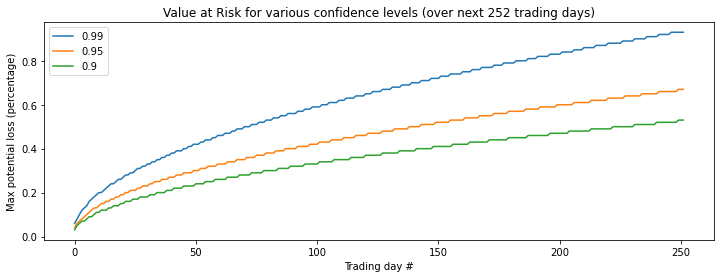

In [7]:
#Charting part

#Various confidence levels for my VaR

confidence_levels=np.array([0.99,0.95,0.90])


#Number of days in my chart

num_days=252


for confidence_level in confidence_levels:
    VaR=var(confidence_level)
    var_array = []
    for x in range(1, num_days+1):
        var_array.append(np.round(abs(VaR) * np.sqrt(x),2))
    
    pyplot.plot(var_array,label=confidence_level)

pyplot.xlabel("Trading day #")
pyplot.ylabel("Max potential loss (percentage)")
pyplot.title("Value at Risk for various confidence levels (over next 252 trading days)")
pyplot.gcf().set_size_inches((12, 4))
pyplot.legend()
pyplot.show()

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.